In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('titanic_train.csv')

In [3]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X = dataset[[ 'Pclass',  'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket','Cabin', 'Embarked']]

In [6]:
y = dataset['Survived']

In [7]:
import seaborn as sns

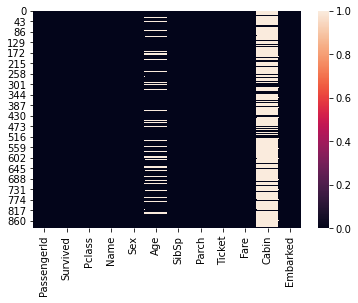

In [8]:
sns.heatmap(dataset.isnull())

In [9]:
X.drop('Cabin',axis=1,inplace=True)

C:\Users\Bhavanshu Arora\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
X.isnull()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False
888,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False


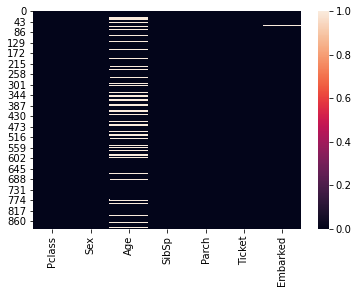

In [11]:
sns.heatmap(X.isnull())

In [12]:
Age = dataset['Age']
Pclass = dataset['Pclass']

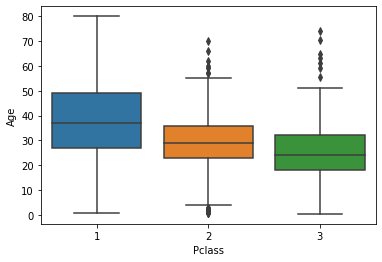

In [13]:
sns.boxplot(x=Pclass,y=Age)

In [18]:
#fetching values for missing age
def lw(cols):
    Pclass = cols[0]
    Age = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        elif Pclass==3:
            return 25
        else:
            return 30
        
    else:
        return Age

In [19]:
age1 = dataset[['Pclass','Age']].apply(lw,axis=1)

In [20]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked'], dtype='object')

In [21]:
X['Age']= age1

<ipython-input-21-dae440c8e379>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']= age1


In [22]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,3,male,22.0,1,0,A/5 21171,S
1,1,female,38.0,1,0,PC 17599,C
2,3,female,26.0,0,0,STON/O2. 3101282,S
3,1,female,35.0,1,0,113803,S
4,3,male,35.0,0,0,373450,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,S
887,1,female,19.0,0,0,112053,S
888,3,female,25.0,1,2,W./C. 6607,S
889,1,male,26.0,0,0,111369,C


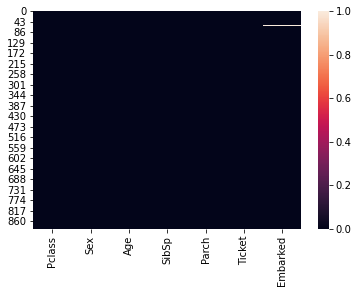

In [23]:
sns.heatmap(X.isnull())


In [24]:
age1

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

In [25]:
X_final = X.dropna() #drop the missing records 

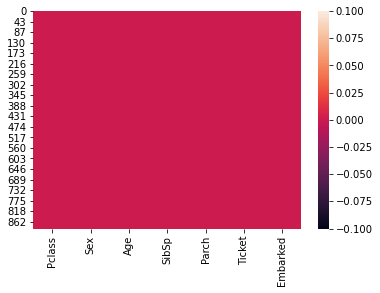

In [26]:
sns.heatmap(X_final.isnull())

In [28]:
sex = dataset['Sex']
sex1 = pd.get_dummies(sex,drop_first=True)

In [30]:
pclass = X['Pclass']
Pclass = pd.get_dummies(pclass,drop_first=True)

In [31]:
Pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [32]:
sibsp = X['SibSp']
Sibsp = pd.get_dummies(sibsp,drop_first=True)

In [33]:
e = X['Embarked']
e1 = pd.get_dummies(e,drop_first=True)

In [36]:
final_data = pd.concat([age1,Pclass,Sibsp,sex1,e1,y],axis=1)

In [37]:
final_data

,0,2,3,1,2,3,4,5,8,male,Q,S,Survived
0,22.0,0,1,1,0,0,0,0,0,1,0,1,0
1,38.0,0,0,1,0,0,0,0,0,0,0,0,1
2,26.0,0,1,0,0,0,0,0,0,0,0,1,1
3,35.0,0,0,1,0,0,0,0,0,0,0,1,1
4,35.0,0,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,1,0,0,0,0,0,0,0,1,0,1,0
887,19.0,0,0,0,0,0,0,0,0,0,0,1,1
888,25.0,0,1,1,0,0,0,0,0,0,0,1,0
889,26.0,0,0,0,0,0,0,0,0,1,0,0,1


In [39]:
final_data.dropna()

,0,2,3,1,2,3,4,5,8,male,Q,S,Survived
0,22.0,0,1,1,0,0,0,0,0,1,0,1,0
1,38.0,0,0,1,0,0,0,0,0,0,0,0,1
2,26.0,0,1,0,0,0,0,0,0,0,0,1,1
3,35.0,0,0,1,0,0,0,0,0,0,0,1,1
4,35.0,0,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,1,0,0,0,0,0,0,0,1,0,1,0
887,19.0,0,0,0,0,0,0,0,0,0,0,1,1
888,25.0,0,1,1,0,0,0,0,0,0,0,1,0
889,26.0,0,0,0,0,0,0,0,0,1,0,0,1


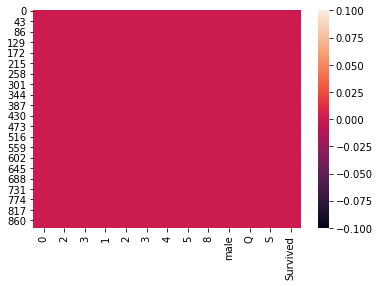

In [41]:
sns.heatmap(final_data.isnull())

In [42]:
y = final_data['Survived']

In [43]:
X = final_data.iloc[:,:-1]

In [44]:
X.head(5)

,0,2,3,1,2,3,4,5,8,male,Q,S
0,22.0,0,1,1,0,0,0,0,0,1,0,1
1,38.0,0,0,1,0,0,0,0,0,0,0,0
2,26.0,0,1,0,0,0,0,0,0,0,0,1
3,35.0,0,0,1,0,0,0,0,0,0,0,1
4,35.0,0,1,0,0,0,0,0,0,1,0,1


In [46]:
#binary classification -> Logistic Regression 

from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
model.fit(X_train,y_train)

C:\Users\Bhavanshu Arora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model.coef_

array([[-0.03765487, -0.95603773, -2.18570249,  0.20602959, -0.04619331,
        -1.27143155, -0.9773096 , -0.7440227 , -1.04902738, -2.49192214,
        -0.03071603, -0.44320621]])

In [56]:
y_pred = model.predict(X_test)

In [70]:
df1 = pd.DataFrame({'x':y_test,'y1':y_pred})

In [60]:
import numpy 

In [72]:
def check(cols):
    x = cols[0]
    y = cols[1]
    if x==y:
        return True
    else:
        return False

In [74]:
check1 = df1.apply(check,axis=1)

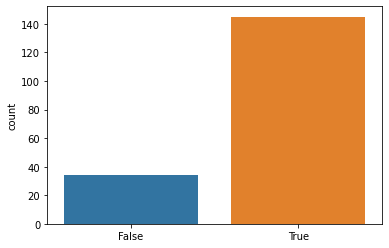

In [78]:
sns.countplot(check1)